## Домашная работа №2

В этом домашнем задании вам необходимо будет решить задачу регрессии (предсказание `humidity` - влажности на основании других погодных характеристик). Данные находятся в файле `data.csv`. При выполнении задания вам нужно проделать следующие шаги:


### EDA (5 баллов)
1) Заполните пропуски в данных (объясните, почему тот или иной способ пропуска наилучший) (*1 балл*)

2) Визуализируйте распределения признаков, сделайте вывод о том, какие признаки являются категориальными, какие числовыми, какие признаки логически связаны между собой (*1 балл*)

3) Очистите выборку от выбросов, поясните, почему эти объекты вы посчитали выбросами (*1 балл*)

4) Рассмотрите матрицу корреляций, удалите высоко скорелированные между собой признаки (если считаете, что этого делать не нужно, то напишите почему), объясните свой выбор (*1 балл*)

5) Визуализируйте данные алгоритмом TSNE, сделайте выводы о разделимости данных и выполнении гипотезы компактности. Попробуйте настроить гиперпараметры алгоритма так, чтобы разделимость была наилучшей (*1 балл*)

### Feature Engineering (5+ баллов)
1) Обработайте все категориальные признаки, используя `Target` / `One-hot` / `label` / `feature encoding` (реализуйте как минимум два разных подхода), объясните свой выбор (*2 балла*)

2) Для числовых признаков создайте новые признаки, имеющие высокую корреляцию с целевой переменной (выше, чем у начальных признаков). Сделайте не менее 5 новых признаков, за очень крутые результаты в этом пункте можно получить дополнительные баллы (*2+ балла*)

3) Сделайте бинарные признаки-индикаторы на основе числовых признаков (признак-индикатор - это, например признак "значение признака x больше 10000"), объясните, почему вы считаете, что эти индикаторы могут быть полезны (*1 балл*)

### Modelling (5 баллов)
1) Предложите наилучшую схему разбиения датасета на трейн, валидацию и тест (объясните, почему так), проверьте, что распределения выборок совпадают (*1 балл*)

2) Попробуйте несколько моделей с подбором гиперпараметров (линейная регрессия, случайный лес / градиентный бустинг и еще любую на ваш выбор), сделайте вывод о том, какая модель дает наилучшее качество и почему (*1 балл*)

3) Постройте график feature importance, сделайте выводы и качестве признаков, сравните feature importance с матрицей корреляции. Посмотрите также, какие признаки зануляет `Lasso` регрессия, сравните результаты с `feature importance` (*2 балла*)

4) Отберите наилучшие признаки и обучите финальную модель, сделайте вывод: получилось ли приемлимое качество, или модель не сильно лучше случайного предсказания? (*1 балл*)

**Важно:** при выполнении этого задания не обязательно ограничиваться только этими пунктами. Вы можете проводить любые дополнительные исследования и применять различные техники, если это потребуется. В каждом пункте обязательно объясняйте результаты и свой ход мыслей при принятии различных решений. Если будет просто код, то есть большой шанс получить очень мало баллов.

**Ограничения:** в пункте `Modelling` можно использовать только те модели, которые были рассмотрены на занятиях. Подбирать гиперпараметры можно любые, не только те, что рассмотрены на занятиях. В остальных пунктам ограничений на используемые алгоритмы нет.

In [1]:
import pandas as pd

data = pd.read_csv('data.csv')
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,NaN,251.0,15.8263,NaN,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,NaN,0.86,14.2646,259.0,15.8263,NaN,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,NaN,9.377778,0.89,3.9284,204.0,14.9569,NaN,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,NaN,1016.41,Partly cloudy throughout the day.
4,NaN,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,NaN,1016.51,Partly cloudy throughout the day.


In [2]:
x = data.drop(['Humidity'], axis=1)
y = data['Humidity']

## Для заоплнения пропуском существуют следущие методы: ##
1) Заполнение средним/медианным значением: применяется для числовых данных, подходит, если данные распределены нормально и пропуски случайны, например, вы можете заменить пропуски в столбце числовых данных средним или медианным значением этого столбца.

2) Заполнение значением по умолчанию: используется, если пропуски имеют особый смысл или если вы хотите заполнить их конкретным значением, например, можно заполнить пропуски в категориальных данных строкой "Неизвестно". (В нашем случае не особо подоходит)

3) Интерполяция: применяется для временных рядов или числовых данных, где значения изменяются по какому-то закону, интерполяция использует соседние значения для расчета пропущенных.

4) Метод заполнения на основе условий: используется, когда вы хотите заполнить пропуски на основе условий из других столбцов, например, если у вас есть столбец "Возраст" и столбец "Пол", вы можете заполнить пропущенные значения в "Возрасте" средним значением для этого пола.

5) Удаление строк/столбцов с пропущенными значениями: применяется, если пропущенных значений немного, и удаление их не повлияет на анализ, но будьте осторожны, чтобы не потерять слишком много данных.

### Бдуем использовать метод интерполяции так как данные взяты по погоде

In [3]:
a = data.columns
a

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [4]:
for column in a:
    data[column].interpolate(inplace=True)

In [5]:
data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,NaN,251.0,15.8263,NaN,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,8.383333,0.86,14.2646,259.0,15.8263,NaN,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,8.822222,9.377778,0.89,3.9284,204.0,14.9569,NaN,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,NaN,1016.41,Partly cloudy throughout the day.
4,NaN,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,NaN,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,NaN,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,NaN,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


## Так как не все пропуски заполнены применим метод заполнения средним значением ##

In [6]:
a = ['Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',]
for column in a:
    data[column].fillna(data[column].mean(), inplace=True)

In [7]:
data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,10.812264,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,8.383333,0.86,14.264600,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,8.822222,9.377778,0.89,3.928400,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.103600,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,NaN,rain,8.755556,6.977778,0.83,11.044600,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.996300,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,NaN,rain,24.583333,24.583333,0.48,10.094700,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.983800,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,NaN,rain,21.522222,21.522222,0.60,10.529400,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [8]:
unique_values = data['Summary'].unique()
print(unique_values)

['Partly Cloudy' 'Mostly Cloudy' nan 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Overcast' 'Windy and Foggy' 'Breezy and Foggy'
 'Windy and Partly Cloudy' 'Breezy' 'Dry and Partly Cloudy'
 'Windy and Mostly Cloudy' 'Dry' 'Windy' 'Humid and Overcast' 'Drizzle'
 'Light Rain' 'Windy and Dry' 'Dry and Mostly Cloudy' 'Breezy and Dry'
 'Rain']


In [9]:
most_common_summary = data['Summary'].mode()[0]
most_common_summary

'Partly Cloudy'

## Чтобы заполнить пропускив текстовых анных используем метод заполнения наиболее часто встречаемым значение, в нашем случае 'Partly Cloudy'

In [10]:
data['Summary'].fillna('Partly Cloudy', inplace=True)

In [11]:
a = 'Summary', 'Precip Type', 'Daily Summary'
for column in a:
    most_common_summary = data[column].mode()[0]
    data[column].fillna(most_common_summary, inplace=True)

In [12]:
data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,10.812264,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,8.383333,0.86,14.264600,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,8.822222,9.377778,0.89,3.928400,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.103600,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,Partly Cloudy,rain,8.755556,6.977778,0.83,11.044600,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.996300,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.094700,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.983800,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.529400,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [13]:
columns_with_nan = data.columns[data.isnull().any()].tolist()
columns_with_nan

[]

## Все пропуски заполнены, переходим ко 2 пункту

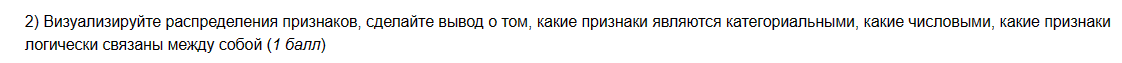

In [14]:
import numpy as np
from fitter import Fitter, get_common_distributions, get_distributions

In [15]:
temperature = np.array(data[['Temperature (C)']])

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.64it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.004913,1012.187657,-1.619675e+06,0.069708,0.033934,6.236314e-97
norm,0.004964,997.531613,-1.618677e+06,0.071492,0.039511,2.884831e-131
cauchy,0.010004,956.612783,-1.551092e+06,0.206108,0.094626,0.000000e+00
uniform,0.024172,828.546807,-1.466004e+06,1.186775,0.261557,0.000000e+00
expon,0.037062,890.693862,-1.424779e+06,1.907684,0.384157,0.000000e+00


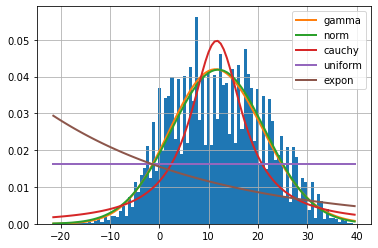

In [16]:
f = Fitter(temperature,
           distributions=["uniform", "expon", "norm", "gamma", "cauchy"])
f.fit()
f.summary()

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.40it/s]
weibull was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.004506,1090.868064,-1.627992e+06,0.063167,0.031416,3.874177e-83
lognorm,0.004899,1014.038659,-1.619955e+06,0.069692,0.032590,1.947624e-89
laplace,0.010025,950.122888,-1.550896e+06,0.156572,0.076046,0.000000e+00
pareto,0.100165,1060.133451,-1.328871e+06,4.789113,0.521975,0.000000e+00
weibull,inf,inf,inf,inf,NaN,NaN


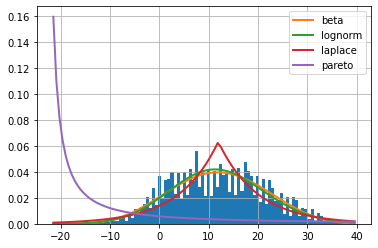

In [17]:
f = Fitter(temperature,
           distributions=["pareto", "laplace","lognorm", "weibull", "beta"])
f.fit()
f.summary()

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.10it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.004506,1090.868064,-1.627992e+06,0.063167,0.031416,3.874177e-83
gamma,0.004913,1012.187657,-1.619675e+06,0.069708,0.033934,6.236314e-97


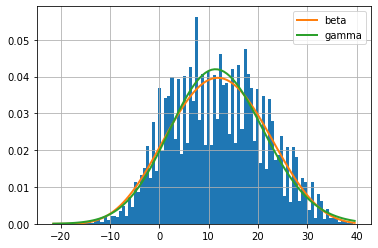

In [18]:
f = Fitter(temperature,
           distributions=["gamma", "beta"])
f.fit()
f.summary()

In [19]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 6.169812173655396,
  'b': 6.390181158626399,
  'loc': -22.396531153790853,
  'scale': 69.91191098072343}}

In [20]:
appartament = np.array(data[['Apparent Temperature (C)']])

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.54it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.004726,1011.923161,-1.623432e+06,inf,0.043107,3.507201e-156
gamma,0.004757,1019.169714,-1.622776e+06,inf,0.045805,2.693383e-176
cauchy,0.009087,972.500453,-1.560363e+06,inf,0.097365,0.000000e+00
uniform,0.019108,845.120862,-1.488679e+06,inf,0.273875,0.000000e+00
expon,0.030517,908.365738,-1.443520e+06,inf,0.380560,0.000000e+00


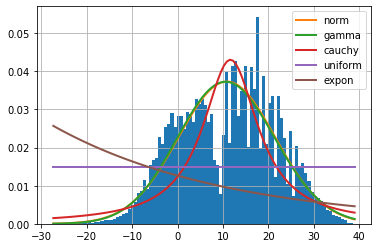

In [21]:
f = Fitter(appartament,
           distributions=["uniform", "expon", "norm", "gamma", "cauchy"])
f.fit()
f.summary()

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.66it/s]
weibull was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.003984,1100.278994,-1.639887e+06,inf,0.036753,1.230358e-113
lognorm,0.004768,1019.626693,-1.622567e+06,inf,0.043444,1.270279e-158
laplace,0.008910,967.823420,-1.562267e+06,inf,0.107153,0.000000e+00
pareto,0.030588,912.908894,-1.443285e+06,inf,0.383672,0.000000e+00
weibull,inf,inf,inf,inf,NaN,NaN


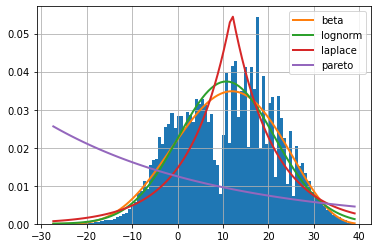

In [22]:
f = Fitter(appartament,
           distributions=["pareto", "laplace","lognorm", "weibull", "beta"])
f.fit()
f.summary()

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.85it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.003984,1100.278994,-1.639887e+06,inf,0.036753,1.230358e-113
norm,0.004726,1011.923161,-1.623432e+06,inf,0.043107,3.507201e-156


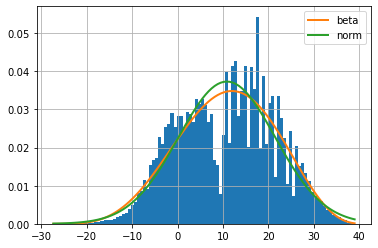

In [23]:
f = Fitter(appartament,
           distributions=["norm", "beta"])
f.fit()
f.summary()

In [24]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 5.293291221246938,
  'b': 4.184973978442734,
  'loc': -27.847214103780175,
  'scale': 69.35438350711135}}

In [25]:
humidity = np.array(data[['Humidity']])

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.06it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,96.173621,196.118310,-666530.550794,inf,0.170101,0.0
norm,96.754590,223.804595,-665949.646510,inf,0.108679,0.0
gamma,101.117670,249.941700,-661683.906304,inf,0.122518,0.0
uniform,137.451255,4.000000,-632085.811653,inf,0.358302,0.0
expon,197.574377,78.468676,-597088.249446,inf,0.344144,0.0


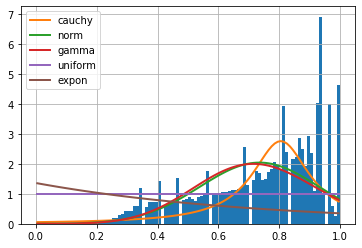

In [26]:
f = Fitter(humidity,
           distributions=["uniform", "expon", "norm", "gamma", "cauchy"])
f.fit()
f.summary()

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.62it/s]
weibull was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,76.097806,49.006170,-6.890907e+05,inf,0.124877,0.0
lognorm,97.089399,226.979344,-6.656050e+05,inf,0.109980,0.0
laplace,99.459991,188.565519,-6.632897e+05,inf,0.124825,0.0
pareto,200.614781,77.878571,-5.956038e+05,inf,0.358469,0.0
weibull,inf,inf,inf,inf,NaN,NaN


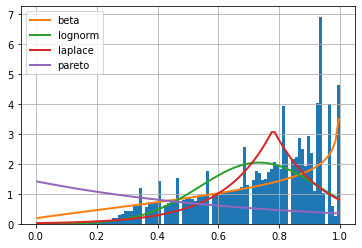

In [27]:
f = Fitter(humidity ,
           distributions=["pareto", "laplace","lognorm", "weibull", "beta"])
f.fit()
f.summary()

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.36it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,76.097806,49.00617,-689090.685236,inf,0.124877,0.0
cauchy,96.173621,196.11831,-666530.550794,inf,0.170101,0.0


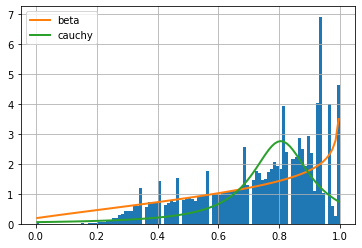

In [28]:
f = Fitter(humidity,
           distributions=["cauchy", "beta"])
f.fit()
f.summary()

In [29]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 1.7925536737334165,
  'b': 0.8000858561321993,
  'loc': -0.10310363314505913,
  'scale': 1.1031036331450594}}

In [30]:
wind_speed = np.array(data[['Wind Speed (km/h)']])

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 16.86it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.015522,1336.653151,-1.508712e+06,inf,0.040320,1.095474e-136
norm,0.019292,2227.049887,-1.487750e+06,inf,0.094162,0.000000e+00
cauchy,0.021690,1130.308286,-1.476454e+06,inf,0.120348,0.000000e+00
expon,0.035581,1070.693366,-1.428711e+06,inf,0.174882,0.000000e+00
uniform,0.064100,835.315460,-1.371937e+06,inf,0.593751,0.000000e+00


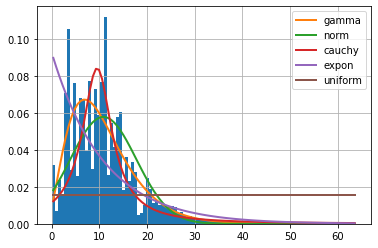

In [31]:
f = Fitter(wind_speed,
           distributions=["uniform", "expon", "norm", "gamma", "cauchy"])
f.fit()
f.summary()

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.85it/s]
weibull was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.015498,1365.871244,-1.508850e+06,inf,0.039198,3.323526e-129
lognorm,0.015816,1266.199071,-1.506905e+06,inf,0.042564,2.791016e-152
laplace,0.019934,1376.586234,-1.484595e+06,inf,0.073910,0.000000e+00
pareto,0.038902,1106.966694,-1.420093e+06,inf,0.197649,0.000000e+00
weibull,inf,inf,inf,inf,NaN,NaN


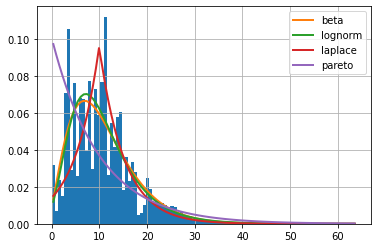

In [32]:
f = Fitter(wind_speed ,
           distributions=["pareto", "laplace","lognorm", "weibull", "beta"])
f.fit()
f.summary()

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.17it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.015498,1365.871244,-1.508850e+06,inf,0.039198,3.323526e-129
cauchy,0.021690,1130.308286,-1.476454e+06,inf,0.120348,0.000000e+00


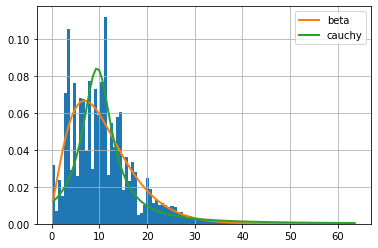

In [33]:
f = Fitter(wind_speed,
           distributions=["cauchy", "beta"])
f.fit()
f.summary()

In [34]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 2.87612708650125,
  'b': 67.02774514229459,
  'loc': -1.2192537347530688,
  'scale': 292.4230120743581}}

In [35]:
wind_bearing = np.array(data[['Wind Bearing (degrees)']])

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.08it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,0.000451,1180.664478,-1.849970e+06,0.253029,0.085457,0.0
norm,0.000562,1216.755132,-1.828858e+06,0.329915,0.090247,0.0
gamma,0.000562,1218.765454,-1.828717e+06,0.331600,0.090508,0.0
cauchy,0.000629,1274.333837,-1.818005e+06,0.386959,0.132436,0.0
expon,0.000667,1242.222856,-1.812303e+06,0.445915,0.223528,0.0


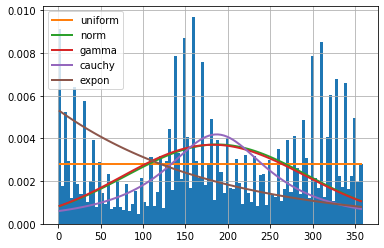

In [36]:
f = Fitter(wind_bearing,
           distributions=["uniform", "expon", "norm", "gamma", "cauchy"])
f.fit()
f.summary()

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.84it/s]
weibull was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.000459,1194.287714,-1.848304e+06,0.248788,0.060364,5.830559e-306
laplace,0.000620,1242.063746,-1.819285e+06,0.373787,0.123451,0.000000e+00
lognorm,0.001835,1619.194435,-1.714677e+06,1.385651,0.667635,0.000000e+00
pareto,0.003062,1469.631763,-1.665278e+06,1.229050,0.363686,0.000000e+00
weibull,inf,inf,inf,inf,NaN,NaN


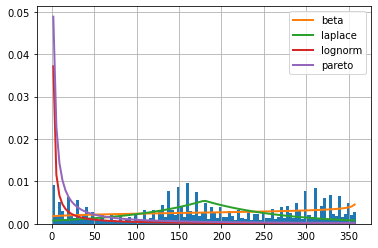

In [37]:
f = Fitter(wind_bearing ,
           distributions=["pareto", "laplace","lognorm", "weibull", "beta"])
f.fit()
f.summary()

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.31it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.000459,1194.287714,-1.848304e+06,0.248788,0.060364,5.830559e-306
cauchy,0.000629,1274.333837,-1.818005e+06,0.386959,0.132436,0.000000e+00


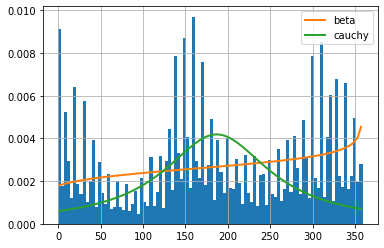

In [38]:
f = Fitter(wind_bearing,
           distributions=["cauchy", "beta"])
f.fit()
f.summary()

In [39]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 1.1404129503274922,
  'b': 0.9023536573330193,
  'loc': -19.387695834267152,
  'scale': 378.3876958342672}}

In [40]:
visibility = np.array(data[['Visibility (km)']])

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.28it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,2.019642,692.610167,-1.039151e+06,1.165161,0.127720,0.0
norm,2.106858,627.363220,-1.035073e+06,1.136065,0.166485,0.0
gamma,2.110834,628.910931,-1.034880e+06,1.119122,0.179836,0.0
uniform,2.150857,559.763854,-1.033080e+06,0.947940,0.328391,0.0
expon,2.341370,626.941376,-1.024894e+06,1.038031,0.335982,0.0


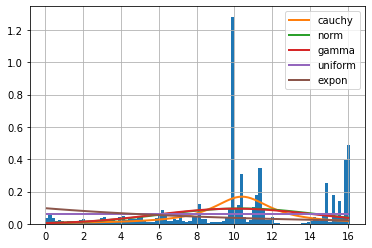

In [41]:
f = Fitter(visibility,
           distributions=["uniform", "expon", "norm", "gamma", "cauchy"])
f.fit()
f.summary()

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.78it/s]
weibull was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace,2.013156,644.161453,-1.039461e+06,1.088575,0.186112,0.0
lognorm,2.108398,628.820973,-1.034991e+06,1.129021,0.172614,0.0
beta,2.174358,740.176289,-1.032009e+06,1.019736,0.470747,0.0
pareto,2.307782,638.731882,-1.026276e+06,1.012030,0.273659,0.0
weibull,inf,inf,inf,inf,NaN,NaN


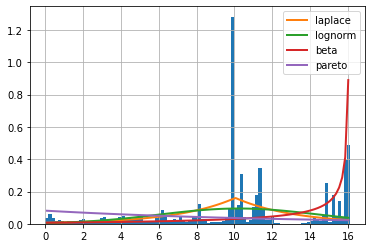

In [42]:
f = Fitter(visibility ,
           distributions=["pareto", "laplace","lognorm", "weibull", "beta"])
f.fit()
f.summary()

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.02it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,2.019642,692.610167,-1.039151e+06,1.165161,0.127720,0.0
beta,2.174358,740.176289,-1.032009e+06,1.019736,0.470747,0.0


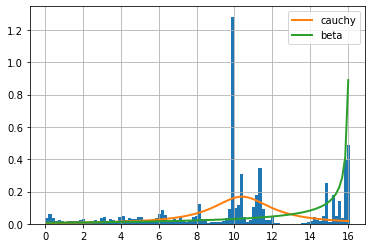

In [43]:
f = Fitter(visibility,
           distributions=["cauchy", "beta"])
f.fit()
f.summary()

#### У параметра Loud Cover выражденное распределение так как оно имеет только 1 значение

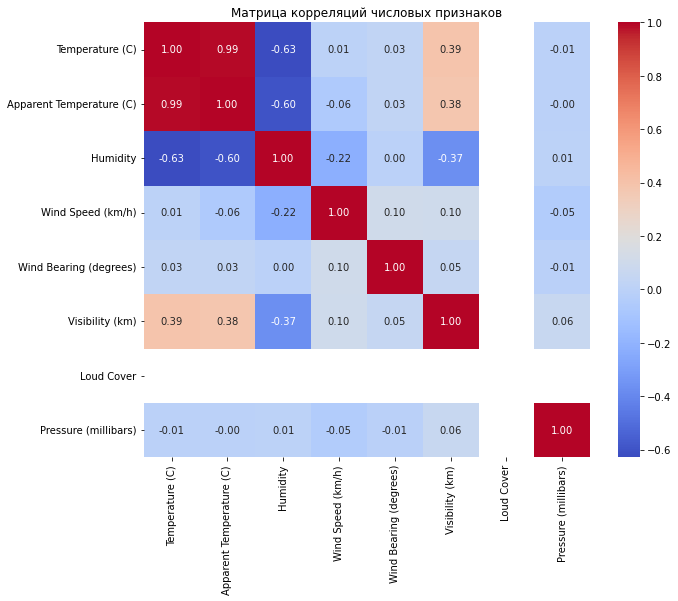

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']

correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций числовых признаков')
plt.show()

#### Из матрицы можно сделать вывод, что параметр Loud Cover ни на что не влияет, поэтому можем его удалить из датасета, также на параметр Humidity не особо влияют параметры: wind speed, wind beaning pressure

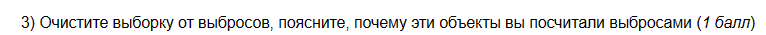

#### Уберем выбросы квантилями

In [101]:
columns = ['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']
Q1 = data['Temperature (C)'].quantile(0.25)
Q3 = data['Temperature (C)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_filtered = data[(data['Temperature (C)'] >= lower_bound) & (data['Temperature (C)'] <= upper_bound)]

for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]

In [102]:
data_filtered

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,10.812264,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,8.383333,0.86,14.264600,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,8.822222,9.377778,0.89,3.928400,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.103600,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,Partly Cloudy,rain,8.755556,6.977778,0.83,11.044600,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.996300,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.094700,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.983800,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.529400,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


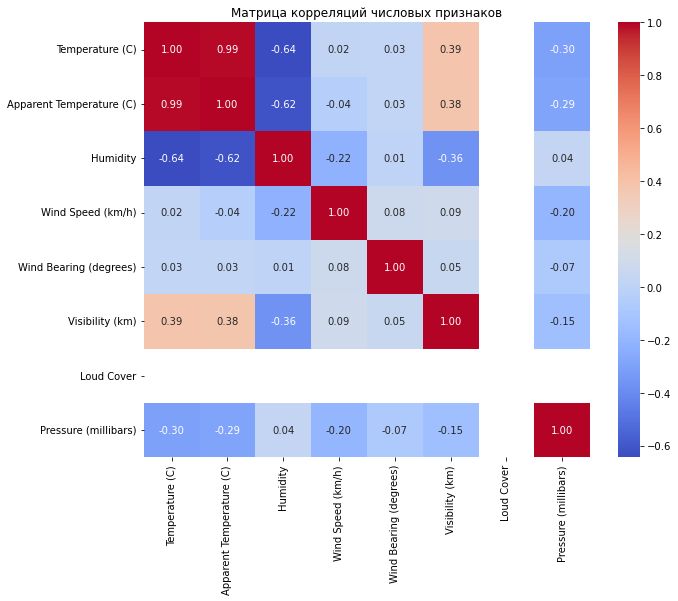

In [103]:
numeric_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']

correlation_matrix = data_filtered[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций числовых признаков')
plt.show()

#### Выбросы удаляли квантилями. Для квантилей выбрали уровни 0.25 и 0.75

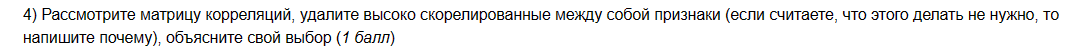

#### Из матрицы корреляции видно, что очень сильно коррелируют Temperature (C) и Apparent Temperature (C). Удалим Apparent Temperature (C) так как на парамтер предсказания этот признак влияет меньше.

In [104]:
feature_to_drop = 'Apparent Temperature (C)'
data_filtered.drop(feature_to_drop, axis=1, inplace=True)
data_filtered

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,0.89,10.812264,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,0.86,14.264600,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,8.822222,0.89,3.928400,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,0.83,14.103600,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,Partly Cloudy,rain,8.755556,0.83,11.044600,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.996300,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,Partly Cloudy,rain,24.583333,0.48,10.094700,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,Partly Cloudy,rain,22.038889,0.56,8.983800,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,Partly Cloudy,rain,21.522222,0.60,10.529400,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


#### Также удалим параметр Loud Cover так как он ни на что не влияет

In [105]:
feature_to_drop = 'Loud Cover'
data_filtered.drop(feature_to_drop, axis=1, inplace=True)
data_1 = data_filtered.copy()
data_filtered

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,0.89,10.812264,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,0.86,14.264600,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,8.822222,0.89,3.928400,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,0.83,14.103600,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,Partly Cloudy,rain,8.755556,0.83,11.044600,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.996300,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,Partly Cloudy,rain,24.583333,0.48,10.094700,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,Partly Cloudy,rain,22.038889,0.56,8.983800,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,Partly Cloudy,rain,21.522222,0.60,10.529400,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


In [106]:
feature_to_drop = ['Summary', 'Precip Type', 'Daily Summary']
data_filtered.drop(feature_to_drop, axis=1, inplace=True)
data_filtered

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,0.89,10.812264,251.0,15.8263,1015.13
1,9.355556,0.86,14.264600,259.0,15.8263,1015.63
2,8.822222,0.89,3.928400,204.0,14.9569,1015.94
3,8.288889,0.83,14.103600,269.0,15.8263,1016.41
4,8.755556,0.83,11.044600,259.0,15.8263,1016.51
...,...,...,...,...,...,...
96448,26.016667,0.43,10.996300,31.0,16.1000,1014.36
96449,24.583333,0.48,10.094700,20.0,15.5526,1015.16
96450,22.038889,0.56,8.983800,30.0,16.1000,1015.66
96451,21.522222,0.60,10.529400,20.0,16.1000,1015.95


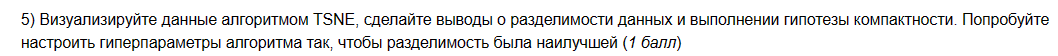

In [50]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_filtered.drop(columns=['Humidity']))

In [52]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(scaled_data)

In [53]:
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Humidity'] = data_filtered['Humidity']

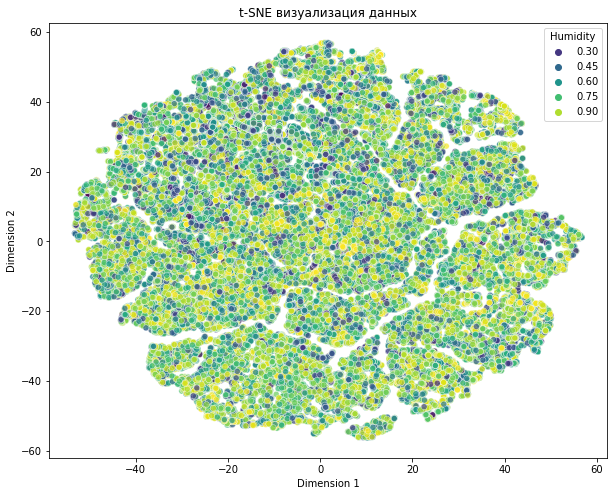

In [54]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Humidity', data=tsne_df, palette='viridis', alpha=0.7)
plt.title('t-SNE визуализация данных')
plt.show()

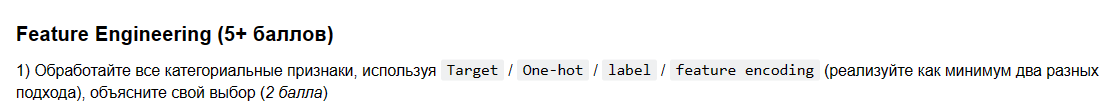

Label Encoding:

1) Подходит, когда порядок значений имеет значение.

2) Преобразует каждое уникальное значение в числовой код.

In [78]:
from sklearn.preprocessing import LabelEncoder

columns = ['Summary', 'Precip Type', 'Daily Summary']

In [79]:
label_encoder = LabelEncoder()
data_encoded = data_1.copy()
data_encoded['Summary'] = label_encoder.fit_transform(data_1['Summary'])
data_encoded

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,15,rain,9.472222,0.89,10.812264,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,15,rain,9.355556,0.86,14.264600,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,13,rain,8.822222,0.89,3.928400,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,15,rain,8.288889,0.83,14.103600,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,15,rain,8.755556,0.83,11.044600,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...
96448,15,rain,26.016667,0.43,10.996300,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,15,rain,24.583333,0.48,10.094700,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,15,rain,22.038889,0.56,8.983800,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,15,rain,21.522222,0.60,10.529400,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


In [80]:
label_encoder = LabelEncoder()
data_encoded = data_1.copy()
data_encoded['Precip Type'] = label_encoder.fit_transform(data_1['Precip Type'])
data_encoded

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,0,9.472222,0.89,10.812264,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,0,9.355556,0.86,14.264600,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,0,8.822222,0.89,3.928400,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,0,8.288889,0.83,14.103600,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,Partly Cloudy,0,8.755556,0.83,11.044600,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,0,26.016667,0.43,10.996300,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,Partly Cloudy,0,24.583333,0.48,10.094700,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,Partly Cloudy,0,22.038889,0.56,8.983800,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,Partly Cloudy,0,21.522222,0.60,10.529400,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


In [81]:
label_encoder = LabelEncoder()
data_encoded = data_1.copy()
data_encoded['Daily Summary'] = label_encoder.fit_transform(data_1['Daily Summary'])
data_encoded

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,0.89,10.812264,251.0,15.8263,1015.13,196
1,Partly Cloudy,rain,9.355556,0.86,14.264600,259.0,15.8263,1015.63,196
2,Mostly Cloudy,rain,8.822222,0.89,3.928400,204.0,14.9569,1015.94,196
3,Partly Cloudy,rain,8.288889,0.83,14.103600,269.0,15.8263,1016.41,196
4,Partly Cloudy,rain,8.755556,0.83,11.044600,259.0,15.8263,1016.51,196
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.996300,31.0,16.1000,1014.36,169
96449,Partly Cloudy,rain,24.583333,0.48,10.094700,20.0,15.5526,1015.16,169
96450,Partly Cloudy,rain,22.038889,0.56,8.983800,30.0,16.1000,1015.66,169
96451,Partly Cloudy,rain,21.522222,0.60,10.529400,20.0,16.1000,1015.95,169


One-Hot Encoding:

1) Создает бинарные (дамми) столбцы для каждого уникального значения категориального признака.

2) Подходит, когда порядок не имеет значения, и категории равнозначны.

In [82]:
data_encoded = pd.get_dummies(data_1, columns=['Summary'], prefix='Summery')
data_encoded

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Summery_Breezy,Summery_Breezy and Mostly Cloudy,...,Summery_Dry and Partly Cloudy,Summery_Foggy,Summery_Humid and Mostly Cloudy,Summery_Humid and Overcast,Summery_Humid and Partly Cloudy,Summery_Light Rain,Summery_Mostly Cloudy,Summery_Overcast,Summery_Partly Cloudy,Summery_Rain
0,rain,9.472222,0.89,10.812264,251.0,15.8263,1015.13,Partly cloudy throughout the day.,0,0,...,0,0,0,0,0,0,0,0,1,0
1,rain,9.355556,0.86,14.264600,259.0,15.8263,1015.63,Partly cloudy throughout the day.,0,0,...,0,0,0,0,0,0,0,0,1,0
2,rain,8.822222,0.89,3.928400,204.0,14.9569,1015.94,Partly cloudy throughout the day.,0,0,...,0,0,0,0,0,0,1,0,0,0
3,rain,8.288889,0.83,14.103600,269.0,15.8263,1016.41,Partly cloudy throughout the day.,0,0,...,0,0,0,0,0,0,0,0,1,0
4,rain,8.755556,0.83,11.044600,259.0,15.8263,1016.51,Partly cloudy throughout the day.,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,rain,26.016667,0.43,10.996300,31.0,16.1000,1014.36,Partly cloudy starting in the morning.,0,0,...,0,0,0,0,0,0,0,0,1,0
96449,rain,24.583333,0.48,10.094700,20.0,15.5526,1015.16,Partly cloudy starting in the morning.,0,0,...,0,0,0,0,0,0,0,0,1,0
96450,rain,22.038889,0.56,8.983800,30.0,16.1000,1015.66,Partly cloudy starting in the morning.,0,0,...,0,0,0,0,0,0,0,0,1,0
96451,rain,21.522222,0.60,10.529400,20.0,16.1000,1015.95,Partly cloudy starting in the morning.,0,0,...,0,0,0,0,0,0,0,0,1,0


In [83]:
data_encoded = pd.get_dummies(data_1, columns=['Precip Type'], prefix='type')
data_encoded

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,type_rain,type_snow
0,Partly Cloudy,9.472222,0.89,10.812264,251.0,15.8263,1015.13,Partly cloudy throughout the day.,1,0
1,Partly Cloudy,9.355556,0.86,14.264600,259.0,15.8263,1015.63,Partly cloudy throughout the day.,1,0
2,Mostly Cloudy,8.822222,0.89,3.928400,204.0,14.9569,1015.94,Partly cloudy throughout the day.,1,0
3,Partly Cloudy,8.288889,0.83,14.103600,269.0,15.8263,1016.41,Partly cloudy throughout the day.,1,0
4,Partly Cloudy,8.755556,0.83,11.044600,259.0,15.8263,1016.51,Partly cloudy throughout the day.,1,0
...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,26.016667,0.43,10.996300,31.0,16.1000,1014.36,Partly cloudy starting in the morning.,1,0
96449,Partly Cloudy,24.583333,0.48,10.094700,20.0,15.5526,1015.16,Partly cloudy starting in the morning.,1,0
96450,Partly Cloudy,22.038889,0.56,8.983800,30.0,16.1000,1015.66,Partly cloudy starting in the morning.,1,0
96451,Partly Cloudy,21.522222,0.60,10.529400,20.0,16.1000,1015.95,Partly cloudy starting in the morning.,1,0


In [84]:
data_encoded = pd.get_dummies(data_1, columns=['Daily Summary'], prefix='day')
data_encoded

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),day_Breezy and foggy until morning.,day_Breezy and mostly cloudy overnight.,...,day_Partly cloudy until evening.,day_Partly cloudy until morning.,day_Partly cloudy until night and breezy in the afternoon.,day_Partly cloudy until night and breezy in the morning.,day_Partly cloudy until night and breezy starting in the morning continuing until afternoon.,day_Partly cloudy until night.,day_Rain throughout the day.,day_Rain until afternoon.,day_Rain until morning.,day_Windy in the afternoon.
0,Partly Cloudy,rain,9.472222,0.89,10.812264,251.0,15.8263,1015.13,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Partly Cloudy,rain,9.355556,0.86,14.264600,259.0,15.8263,1015.63,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mostly Cloudy,rain,8.822222,0.89,3.928400,204.0,14.9569,1015.94,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Partly Cloudy,rain,8.288889,0.83,14.103600,269.0,15.8263,1016.41,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Partly Cloudy,rain,8.755556,0.83,11.044600,259.0,15.8263,1016.51,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.996300,31.0,16.1000,1014.36,0,0,...,0,0,0,0,0,0,0,0,0,0
96449,Partly Cloudy,rain,24.583333,0.48,10.094700,20.0,15.5526,1015.16,0,0,...,0,0,0,0,0,0,0,0,0,0
96450,Partly Cloudy,rain,22.038889,0.56,8.983800,30.0,16.1000,1015.66,0,0,...,0,0,0,0,0,0,0,0,0,0
96451,Partly Cloudy,rain,21.522222,0.60,10.529400,20.0,16.1000,1015.95,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Для Target Encoding и Feature Encodin нужно реобразовать категориальные признаки в числовые значения, основываясь на целевой переменной. Также для Target Encoding нужно убедиться, что выборка достаточно большая, чтобы статистические значения были информативными. Также, важно обработать случай переобучения, который может возникнуть, если использовать (например) статистику по всей выборке. Решение может включать использование отложенной выборки, кросс-валидации или других методов. Поэтому их реализовывать не хочу

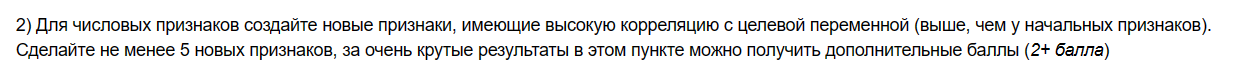

In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
target_column = 'Humidity'

In [87]:
numeric_features = data_encoded.select_dtypes(include=['float64', 'float64']).columns

In [88]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(data_filtered[numeric_features])

In [89]:
poly_feature_names = poly.get_feature_names(numeric_features)
data_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

In [90]:
for feature in numeric_features:
    data_poly[f'{feature}_mean'] = data_filtered[feature].mean()

In [91]:
data_filtered_with_new_features = pd.concat([data_filtered, data_poly], axis=1)

In [92]:
correlation_with_target = data_filtered_with_new_features.corr()[target_column]

correlation_with_target = correlation_with_target.iloc[:, :-1]

result_df = pd.DataFrame(correlation_with_target.abs().sort_values(by = 'Humidity', ascending=False))

print(result_df)


                                             Humidity
Humidity                                     1.000000
Temperature (C)                              0.644100
Visibility (km)                              0.364217
Wind Speed (km/h)                            0.222976
Pressure (millibars)                         0.035004
Humidity Visibility (km)                     0.021943
Visibility (km) Pressure (millibars)         0.020783
Visibility (km)                              0.020779
Visibility (km)^2                            0.018145
Wind Bearing (degrees) Visibility (km)       0.016712
Wind Speed (km/h) Visibility (km)            0.011229
Wind Bearing (degrees)^2                     0.010233
Wind Bearing (degrees)                       0.009829
Temperature (C)^2                            0.009245
Humidity Wind Bearing (degrees)              0.006253
Wind Bearing (degrees)                       0.006115
Wind Bearing (degrees) Pressure (millibars)  0.006110
Temperature (C) Humidity    

In [93]:
top_correlated_features = correlation_with_target.head(5)
print(top_correlated_features)

                        Humidity
Temperature (C)        -0.644100
Humidity                1.000000
Wind Speed (km/h)      -0.222976
Wind Bearing (degrees)  0.009829
Visibility (km)        -0.364217


Теперь посмотрим глазками какие 5 лучших признаков появились:
- Visibility (km) Pressure (millibars)$\newline$
- Visibility (km)^2$\newline$
- Wind Bearing (degrees) Visibility (km)$\newline$
- Wind Speed (km/h) Visibility (km)$\newline$
- Wind Bearing (degrees)^2$\newline$

Создали полиномиальные признаки второй степени и добавили статистические признаки (в данном случае, средние значения) для числовых признаков

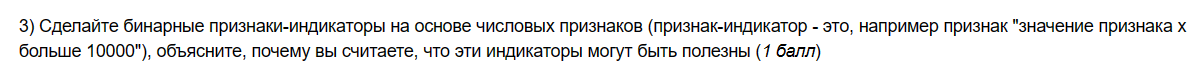

Создание бинарных признаков-индикаторов на основе числовых признаков может быть полезным для улучшения производительности модели в некоторых случаях. Эти признаки-индикаторы могут помочь модели улавливать нелинейные зависимости или важные пороговые значения в данных. Почему это может быть полезно:

- Учет пороговых значений: Если числовые признаки содержат важные пороговые значения, то создание бинарных индикаторов может помочь модели лучше учесть эти пороги. Например, можно создать индикатор, который равен 1, если значение признака больше заданного порога, и 0 в противном случае.$\newline$

- Учет нелинейных зависимостей: Если зависимость между целевой переменной и числовым признаком нелинейна, то бинарные индикаторы могут помочь зафиксировать нелинейные тренды. Например, можно создать индикатор, который равен 1, если значение признака лежит в определенном диапазоне, и 0 в противном случае.$\newline$

- Снижение сложности модели: Иногда модели могут затрудниться с обработкой сложных числовых значений. Создание бинарных индикаторов может упростить задачу для модели, сделав данные более интерпретируемыми.$\newline$

In [109]:
data_bin = data_filtered.copy()
columns = data_bin.columns
for column in columns:
    mean = data_bin[column].mean()
    data_bin[column] = (data_bin[column] > mean).astype(int)
data_bin

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0,1,1,1,1,0
1,0,1,1,1,1,0
2,0,1,0,1,1,0
3,0,1,1,1,1,0
4,0,1,1,1,1,0
...,...,...,...,...,...,...
96448,1,0,1,0,1,0
96449,1,0,0,0,1,0
96450,1,0,0,0,1,0
96451,1,0,1,0,1,0


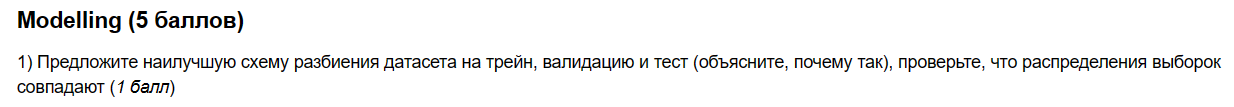

Из практики которая у меня была обычно на train отводят 70% данных, поэтому тут так и поступим, на val отведем 20% и на test 10%

In [111]:
train_data = data_filtered.sample(frac=0.7, random_state=42)
val_data = data_filtered.sample(frac=0.2, random_state=42)
test_data = data_filtered.sample(frac=0.1, random_state=42)

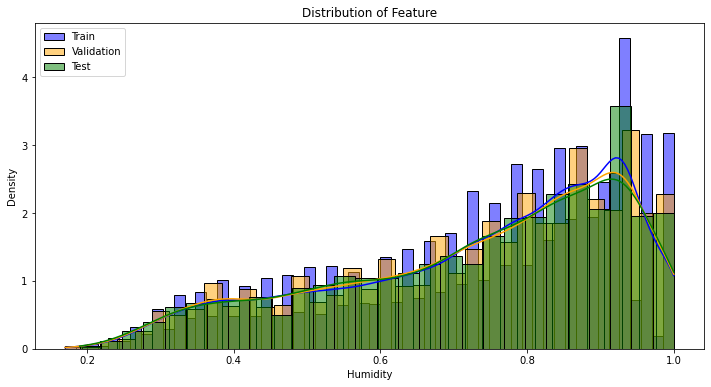

In [112]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train_data, x='Humidity', kde=True, color='blue', label='Train', stat='density', common_norm=False)
sns.histplot(data=val_data, x='Humidity', kde=True, color='orange', label='Validation', stat='density', common_norm=False)
sns.histplot(data=test_data, x='Humidity', kde=True, color='green', label='Test', stat='density', common_norm=False)

plt.title('Distribution of Feature')
plt.legend()
plt.show()

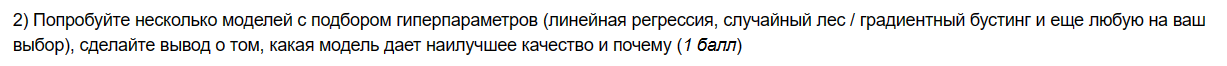

In [115]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [118]:
# Предположим, что 'X' - матрица признаков, 'y' - вектор целевых значений
# Разбиваем данные на тренировочный и тестовый наборы
X_train = train_data[['Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']] 
X_test = test_data['Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
y_train = train_data['Humidity']
y_test = test_data['Humidity']

KeyError: ('Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)')

In [ ]:
# Линейная регрессия
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_pred))
print(f"Linear Regression RMSE: {linear_reg_rmse}")

In [ ]:
random_forest = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=3, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
rf_pred = best_rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Best Random Forest Hyperparameters: {grid_search_rf.best_params_}")

In [ ]:
xgb = XGBRegressor(random_state=42)
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_
xgb_pred = best_xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"Best XGBoost Hyperparameters: {grid_search_xgb.best_params_}")